# Titanic Kaggle Competition

# Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

### Variables

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| pcclass  | Ticket Class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

## Lets start coding

#### Libararies and load

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

TODO --> We should merge the dataset and process both together

In [2]:
training_data = pd.read_csv('data/train.csv')
testing_data = pd.read_csv('data/test.csv')

print(training_data.shape)
print(testing_data.shape)

(891, 12)
(418, 11)


In [3]:
print(testing_data.sample(5))

     PassengerId  Pclass                          Name     Sex   Age  SibSp  \
87           979       3    Badman, Miss. Emily Louisa  female  18.0      0   
233         1125       3          Linehan, Mr. Michael    male   NaN      0   
207         1099       2  Collett, Mr. Sidney C Stuart    male  24.0      0   
9            901       3       Davies, Mr. John Samuel    male  21.0      2   
71           963       3            Minkoff, Mr. Lazar    male  21.0      0   

     Parch     Ticket     Fare Cabin Embarked  
87       0  A/4 31416   8.0500   NaN        S  
233      0     330971   7.8792   NaN        Q  
207      0      28034  10.5000   NaN        S  
9        0  A/4 48871  24.1500   NaN        S  
71       0     349211   7.8958   NaN        S  


In [4]:
#Looking data format and types
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#Some Statistics
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(training_data.isnull().sum())
testing_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

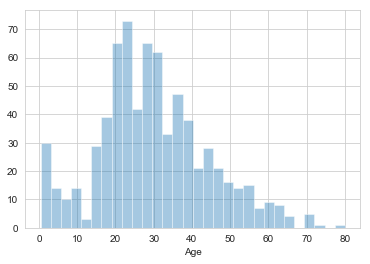

In [7]:
sns.distplot(training_data['Age'].dropna(), bins=30, kde=False)

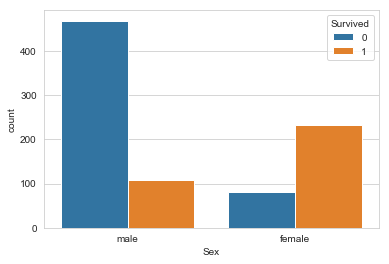

In [8]:
sns.countplot(x='Sex',data=training_data,hue='Survived')

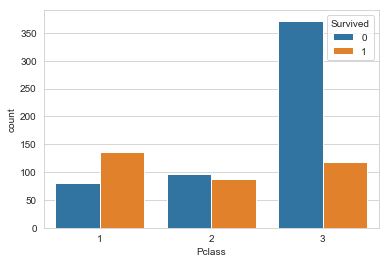

In [9]:
sns.countplot(x='Pclass',data=training_data,hue='Survived')

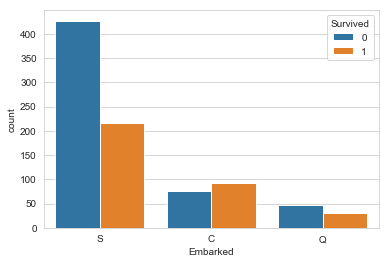

In [10]:
sns.countplot(x='Embarked',data=training_data,hue='Survived')

## Feature Engineering

First lets take care of null values and drop the ones we dont need
- Cabin (numerical) has 687 null values out of 891 examples on the training, so we will just drop out
- Fare and Age (numerical) has a bit more null values but we can take care of them, fill with the mean
- Embarked (categorical), only 2 values we can fill with the most comon value
- PassengerId (numerical) not relevant
- Ticket (numerical) not relevant

In [11]:
def fill_na(df):
    df['Age'].fillna(df["Age"].mean(), inplace = True)
    df['Embarked'].fillna(training_data['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df["Fare"].mean(), inplace = True)
    
    #Drop columns
    delete_columns = ["PassengerId", "Ticket", "Cabin"]
    df.drop(delete_columns, axis=1, inplace = True)
    return df

In [12]:
training_data = fill_na(training_data)
testing_data = fill_na(testing_data)

The name is irrelevant but we can get some usefull information from it, as we can see it shows the title of the person.
So we will process it and get only the most common ones.
- Mr
- Miss
- Mrs
- Master

In [13]:
print(training_data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip()).unique())
training_data['Name']=training_data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
testing_data['Name']=testing_data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [14]:
print(training_data.groupby('Name').size().nlargest(5))

Name
Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
dtype: int64


In [15]:
# Remain the most common ones and all the "rares" to the category other
def name(x):
    titles = ['Mr', 'Miss', 'Mrs','Master']
    if x not in titles:
        return 'other'
    else:
        return x

In [16]:
training_data['Name'] = training_data['Name'].apply(name)
testing_data['Name']= testing_data['Name'].apply(name)

In [17]:
print(training_data.groupby('Name').size().nlargest(5))
print(testing_data.groupby('Name').size().nlargest(5))

Name
Mr        517
Miss      182
Mrs       125
Master     40
other      27
dtype: int64
Name
Mr        240
Miss       78
Mrs        72
Master     21
other       7
dtype: int64


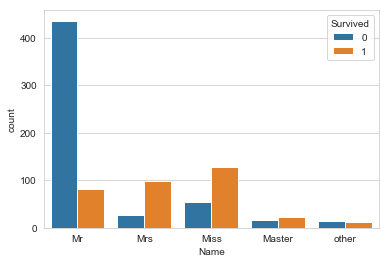

In [18]:
sns.countplot(x='Name',data=training_data,hue='Survived')

### Create categorical variable
Lets create some categorical from Age and Fare.

This will be better if we choose our cuts



In [19]:
# Maybe we dont need this and should be better if we choose our cuts but for simplicity
training_data['CategoricalAge'] = pd.cut(training_data['Age'], 5)
training_data['CategoricalFare'] = pd.cut(training_data['Fare'], 4)
testing_data['CategoricalAge'] = pd.cut(testing_data['Age'], 5)
testing_data['CategoricalFare'] = pd.cut(testing_data['Fare'], 4)
# And drop the old columns
training_data.drop("Age", axis=1, inplace=True)
training_data.drop("Fare", axis=1, inplace=True)
testing_data.drop("Age", axis=1, inplace=True)
testing_data.drop("Fare", axis=1, inplace=True)

In [20]:
print(training_data.groupby('CategoricalAge').size())

CategoricalAge
(0.34, 16.336]      100
(16.336, 32.252]    523
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
dtype: int64


In [21]:
def family(df):
    df['isAlone'] = df.apply(lambda x: 0 if x.SibSp + x.Parch >=1 else 1, axis=1)    
    df['familySize'] = df.apply(lambda x: x.SibSp + x.Parch + 1, axis=1)
    df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
    return df
training_data = family(training_data)
testing_data = family(testing_data)

### Change our categorical variables to dummie
First we need to change Pclass to categorical because right is numerical on our Dataframe

In [22]:
print(type(training_data['Pclass'][0]))
training_data['Pclass'] = training_data['Pclass'].apply(str)
testing_data['Pclass'] = testing_data['Pclass'].apply(str)
print(type(training_data['Pclass'][0]))

<class 'numpy.int64'>
<class 'str'>


In [23]:
print(training_data.shape)
print(testing_data.shape)
training_data = pd.get_dummies(training_data,drop_first=True)
testing_data = pd.get_dummies(testing_data,drop_first=True)
print(training_data.shape)
print(testing_data.shape)

(891, 9)
(418, 8)
(891, 19)
(418, 18)


In [24]:
training_data.sample(1)

,Survived,isAlone,familySize,Pclass_2,Pclass_3,Name_Miss,Name_Mr,Name_Mrs,Name_other,Sex_male,Embarked_Q,Embarked_S,"CategoricalAge_(16.336, 32.252]","CategoricalAge_(32.252, 48.168]","CategoricalAge_(48.168, 64.084]","CategoricalAge_(64.084, 80.0]","CategoricalFare_(128.082, 256.165]","CategoricalFare_(256.165, 384.247]","CategoricalFare_(384.247, 512.329]"
642,0,0,6,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
testing_data.sample(1)

,isAlone,familySize,Pclass_2,Pclass_3,Name_Miss,Name_Mr,Name_Mrs,Name_other,Sex_male,Embarked_Q,Embarked_S,"CategoricalAge_(15.336, 30.502]","CategoricalAge_(30.502, 45.668]","CategoricalAge_(45.668, 60.834]","CategoricalAge_(60.834, 76.0]","CategoricalFare_(128.082, 256.165]","CategoricalFare_(256.165, 384.247]","CategoricalFare_(384.247, 512.329]"
376,0,3,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0


In [26]:
x_train = training_data.iloc[:, 1:].values
y_train = training_data.iloc[:, :1].values

In [27]:
print(x_train[0])
print(y_train[0])

[0 2 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0]
[0]


## Lets build our Keras model

In [28]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [29]:
def build_classifier():
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    # Numer or nodes are art, but here we are taking,number of ind variables+ dependent variables --> 11+1 /2
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    # Adding the second hidden layer
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    # Compiling the ANN
    #adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])  # if we have more than two categories, categorical_crossentropy
    return classifier

In [30]:
classifier = build_classifier()
classifier.fit(x_train, y_train, batch_size = 32, epochs =100, verbose=1, validation_split=0.2) # 0.8058

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 6s 8ms/step - loss: 0.6920 - acc: 0.6096 - val_loss: 0.6894 - val_acc: 0.6425
Epoch 2/100
712/712 [==============================] - 0s 591us/step - loss: 0.6871 - acc: 0.6096 - val_loss: 0.6798 - val_acc: 0.6425
Epoch 3/100
712/712 [==============================] - 0s 428us/step - loss: 0.6748 - acc: 0.6096 - val_loss: 0.6568 - val_acc: 0.6425
Epoch 4/100
712/712 [==============================] - 0s 458us/step - loss: 0.6496 - acc: 0.6096 - val_loss: 0.6205 - val_acc: 0.6425
Epoch 5/100
712/712 [==============================] - 0s 378us/step - loss: 0.6156 - acc: 0.6096 - val_loss: 0.5763 - val_acc: 0.6425
Epoch 6/100
712/712 [==============================] - 0s 407us/step - loss: 0.5807 - acc: 0.6419 - val_loss: 0.5370 - val_acc: 0.7765
Epoch 7/100
712/712 [==============================] - 0s 380us/step - loss: 0.5541 - acc: 0.7612 - val_loss: 0.5136 - val_acc: 0.8045
Epoch 8/100

Epoch 61/100
712/712 [==============================] - 0s 258us/step - loss: 0.4287 - acc: 0.8146 - val_loss: 0.3795 - val_acc: 0.8492
Epoch 62/100
712/712 [==============================] - 0s 237us/step - loss: 0.4263 - acc: 0.8160 - val_loss: 0.3805 - val_acc: 0.8436
Epoch 63/100
712/712 [==============================] - 0s 234us/step - loss: 0.4273 - acc: 0.8160 - val_loss: 0.3771 - val_acc: 0.8492
Epoch 64/100
712/712 [==============================] - 0s 239us/step - loss: 0.4251 - acc: 0.8146 - val_loss: 0.3770 - val_acc: 0.8492
Epoch 65/100
712/712 [==============================] - 0s 247us/step - loss: 0.4248 - acc: 0.8174 - val_loss: 0.3761 - val_acc: 0.8492
Epoch 66/100
712/712 [==============================] - 0s 243us/step - loss: 0.4236 - acc: 0.8174 - val_loss: 0.3757 - val_acc: 0.8492
Epoch 67/100
712/712 [==============================] - 0s 240us/step - loss: 0.4249 - acc: 0.8118 - val_loss: 0.3730 - val_acc: 0.8492
Epoch 68/100
712/712 [==========================

In [31]:
y_pred = classifier.predict(testing_data)

In [32]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [33]:
y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    